In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier      
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')

In [2]:
xq=pd.read_csv("WQ_With_Outliers.csv")
y=pd.read_csv("Target_variable.csv")
xqn=pd.read_csv("WQ_Without_Outliers.csv")
xqr=pd.read_csv("WQ_Replaced_Outliers.csv")

In [3]:
xq.drop(columns='Unnamed: 0',inplace=True)
xqn.drop(columns='Unnamed: 0',inplace=True)
xqr.drop(columns='Unnamed: 0',inplace=True)
y.drop(columns='Unnamed: 0',inplace=True)

In [4]:
yqn=xqn.iloc[:,-1]
xqn.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
2,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
3,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [5]:
xqn.drop(columns='Potability',inplace=True)

In [6]:
smote=SMOTE(random_state=42)

# Traning With Outliers

In [7]:
x_train,x_test,y_train,y_test=train_test_split(xq,y,test_size=0.2,random_state=42)

In [8]:
x_train,y_train=smote.fit_resample(x_train,y_train)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Decision Tree

In [10]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=20)

In [11]:
clf = clf.fit(x_train,y_train)

In [12]:
y_pred = clf.predict(x_test)

In [13]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7317073170731707


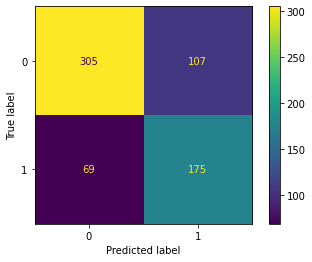

In [14]:
cnf_matrix = confusion_matrix(y_test, y_pred) 
ConfusionMatrixDisplay(cnf_matrix).plot()

## Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators = 80,criterion="entropy",random_state = 42)

In [16]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=42)

In [17]:
y_pred2 = rf.predict(x_test)

In [18]:
print("Accuracy:",accuracy_score(y_test, y_pred2))

Accuracy: 0.7759146341463414


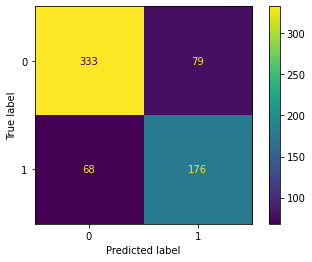

In [19]:
rf_matrix = confusion_matrix(y_test, y_pred2) 
ConfusionMatrixDisplay(rf_matrix).plot()

## MLP

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(20,),max_iter=200,random_state=42)

In [21]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(20,), random_state=42)

In [22]:
y_pred3 = mlp.predict(x_test)

In [23]:
print("Accuracy:",accuracy_score(y_test, y_pred3))

Accuracy: 0.6554878048780488


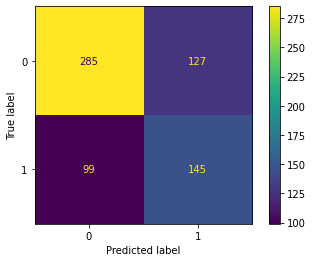

In [24]:
mlp_matrix = confusion_matrix(y_test, y_pred3) 
ConfusionMatrixDisplay(mlp_matrix).plot()

## Gradient Boosting

In [25]:
gb=GradientBoostingClassifier(loss="exponential",n_estimators=100,criterion="squared_error",random_state=42)

In [26]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           random_state=42)

In [27]:
y_pred4 = gb.predict(x_test)

In [28]:
print("Accuracy:",accuracy_score(y_test, y_pred4))

Accuracy: 0.7621951219512195


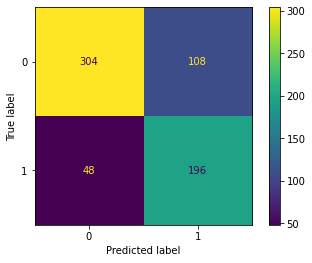

In [29]:
gb_matrix = confusion_matrix(y_test, y_pred4) 
ConfusionMatrixDisplay(gb_matrix).plot()

# Traning Without Outliers

In [30]:
xqn_train,xqn_test,yqn_train,yqn_test=train_test_split(xqn,yqn,test_size=0.2,random_state=42)

In [31]:
xqn_train,yqn_train=smote.fit_resample(xqn_train,yqn_train)

In [32]:
xqn_train=scaler.fit_transform(xqn_train)
xqn_test=scaler.transform(xqn_test)

## Decision Tree

In [33]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=20)

In [34]:
clf = clf.fit(xqn_train,yqn_train)

In [35]:
y_predqn = clf.predict(xqn_test)

In [36]:
print("Accuracy:",accuracy_score(yqn_test, y_predqn))

Accuracy: 0.7199248120300752


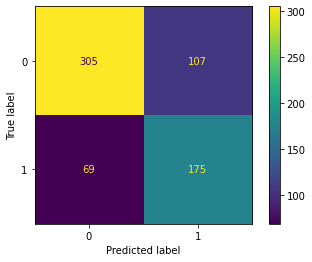

In [37]:
cnfqn_matrix = confusion_matrix(yqn_test, y_predqn) 
ConfusionMatrixDisplay(cnf_matrix).plot()

## Random Forest

In [38]:
rf = RandomForestClassifier(n_estimators = 80,criterion="entropy",random_state = 42)

In [39]:
rf.fit(xqn_train, yqn_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=42)

In [40]:
y_predqn1 = rf.predict(xqn_test)

In [41]:
print("Accuracy:",accuracy_score(yqn_test, y_predqn1))

Accuracy: 0.7913533834586466


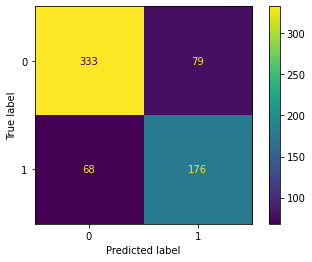

In [42]:
rfqn_matrix = confusion_matrix(yqn_test, y_predqn1) 
ConfusionMatrixDisplay(rf_matrix).plot()

## MLP

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(20,),max_iter=200,random_state=42)

In [44]:
mlp.fit(xqn_train,yqn_train)

MLPClassifier(hidden_layer_sizes=(20,), random_state=42)

In [45]:
y_predqn2 = mlp.predict(xqn_test)

In [46]:
print("Accuracy:",accuracy_score(yqn_test, y_predqn2))

Accuracy: 0.6259398496240601


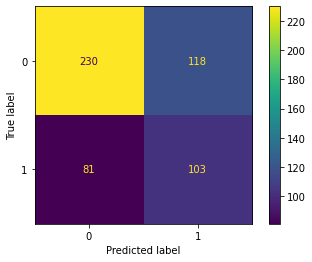

In [47]:
mlp_matrix = confusion_matrix(yqn_test, y_predqn2) 
ConfusionMatrixDisplay(mlp_matrix).plot()

## Gradient Boosting

In [48]:
gb=GradientBoostingClassifier(loss="exponential",n_estimators=100,criterion="squared_error",random_state=42)

In [49]:
gb.fit(xqn_train,yqn_train)

GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           random_state=42)

In [50]:
y_predqn3 = gb.predict(xqn_test)

In [51]:
print("Accuracy:",accuracy_score(yqn_test, y_predqn3))

Accuracy: 0.7180451127819549


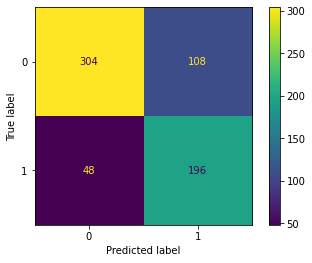

In [52]:
gbqn_matrix = confusion_matrix(yqn_test, y_predqn3) 
ConfusionMatrixDisplay(gb_matrix).plot()

# Traning With Outliers Replaced

In [53]:
xqr_train,xqr_test,yqr_train,yqr_test=train_test_split(xqr,y,test_size=0.2,random_state=42)

In [54]:
xqr_train,yqr_train=smote.fit_resample(xqr_train,yqr_train)

In [55]:
xqr_train=scaler.fit_transform(xqr_train)
xqr_test=scaler.transform(xqr_test)

## Decision Tree

In [56]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=20)

In [57]:
clf = clf.fit(xqr_train,yqr_train)

In [58]:
y_predqr = clf.predict(xqr_test)

In [59]:
print("Accuracy:",accuracy_score(yqr_test, y_predqr))

Accuracy: 0.7027439024390244


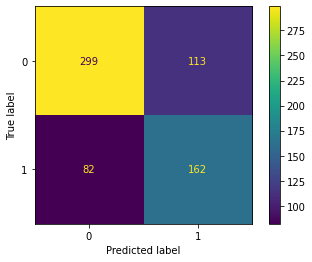

In [60]:
cnfqr_matrix = confusion_matrix(yqr_test, y_predqr) 
ConfusionMatrixDisplay(cnfqr_matrix).plot()

## Random Forest

In [61]:
rf = RandomForestClassifier(n_estimators = 80,criterion="entropy",random_state = 42)

In [62]:
rf.fit(xqr_train, yqr_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=42)

In [63]:
y_predqr2 = rf.predict(xqr_test)

In [64]:
print("Accuracy:",accuracy_score(yqr_test, y_predqr2))

Accuracy: 0.7286585365853658


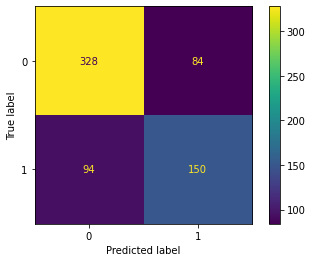

In [65]:
rfqr_matrix = confusion_matrix(yqr_test, y_predqr2) 
ConfusionMatrixDisplay(rfqr_matrix).plot()

## MLP

In [66]:
mlp = MLPClassifier(hidden_layer_sizes=(20,),max_iter=200,random_state=42)

In [67]:
mlp.fit(xqr_train,yqr_train)

MLPClassifier(hidden_layer_sizes=(20,), random_state=42)

In [68]:
y_predqr3 = mlp.predict(xqr_test)

In [69]:
print("Accuracy:",accuracy_score(yqr_test, y_predqr3))

Accuracy: 0.6036585365853658


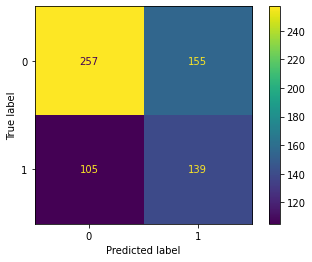

In [70]:
mlpqr_matrix = confusion_matrix(yqr_test, y_predqr3) 
ConfusionMatrixDisplay(mlpqr_matrix).plot()

## Gradient Boosting

In [71]:
gb=GradientBoostingClassifier(loss="exponential",n_estimators=100,criterion="squared_error",random_state=42)

In [72]:
gb.fit(xqr_train,yqr_train)

GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           random_state=42)

In [73]:
y_predqr4 = gb.predict(xqr_test)

In [74]:
print("Accuracy:",accuracy_score(yqr_test, y_predqr4))

Accuracy: 0.7301829268292683


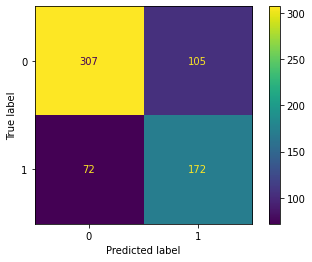

In [75]:
gbqr_matrix = confusion_matrix(yqr_test, y_predqr4) 
ConfusionMatrixDisplay(gbqr_matrix).plot()